In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
df = pd.read_csv("../build/measurement2.csv", names=['throttle', 'v', 'a'])
df.head()

,throttle,v,a
0,1.0,0.187694,20.5566
1,1.0,1.576060,11.3933
2,1.0,2.881420,10.5566
3,1.0,4.238540,11.3264
4,1.0,5.571260,10.9228


## Clean data

In [55]:
# remove samples with acceleration < 0
df = df[df['a'] > 0]
df.reset_index(drop=True).head()

,throttle,v,a
0,0.6,60.81280,0.977975
1,1.0,5.57126,10.922800
2,0.6,48.13250,2.288130
3,0.2,13.63120,1.176680
4,0.8,42.46690,5.240810


## Feature generation

The vehicle should have a maximum power so the acceleration should be dependent on throttle, v and v^2.

In [89]:
# random shuffle of the data set
df = df.sample(frac=1).reset_index(drop=True)
df_features = df[['throttle', 'v']]
# add v² to features
df_features['v2'] = df_features['v'] * df_features['v']
print(df_features.head())
print('Number of samples {}'.format(df_features.size))

   throttle        v           v2
0       0.6  50.2777  2527.847117
1       1.0  95.8618  9189.484699
2       0.4  15.0114   225.342130
3       1.0  18.7613   351.986378
4       1.0  91.8322  8433.152957
Number of samples 2565


## Train/test split

In [90]:
features = np.array(df_features)

split = int(df_features.shape[0] * 0.2)

X_train = features[:-split]
X_test = features[-split:]

y_all = np.array(df['a'])
y_train = y_all[:-split]
y_test = y_all[-split:]

## Fit the linear regression model

In [107]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE test = {:.4f}  MSE train = {:.4f}'.format(mse_test, mse_train))
print('Model coefficients = {}'.format(regr.coef_))

MSE test = 0.6374  MSE train = 0.1743
Model coefficients = [ 1.19794201e+01 -9.66026094e-02 -8.01485411e-05]


## Plot results

Plausibility can be checked

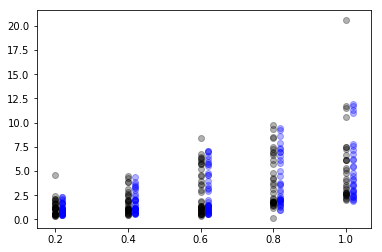

In [108]:
plt.scatter(X_test[:,0], y_test,  color='black', alpha=0.3)
plt.scatter(X_test[:,0] + 0.02, y_pred, color='blue', alpha=0.3)

plt.show()

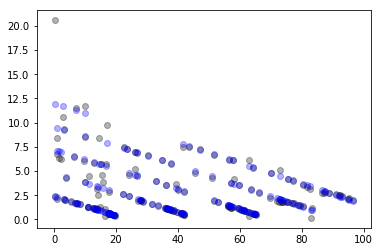

In [109]:
plt.scatter(X_test[:,1], y_test,  color='black', alpha=0.3)
plt.scatter(X_test[:,1], y_pred, color='blue', alpha=0.3)

plt.show()

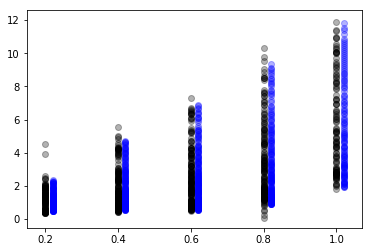

In [110]:
plt.scatter(X_train[:,0], y_train,  color='black', alpha=0.3)
plt.scatter(X_train[:,0]+0.02, y_pred_train, color='blue', alpha=0.3)

plt.show()

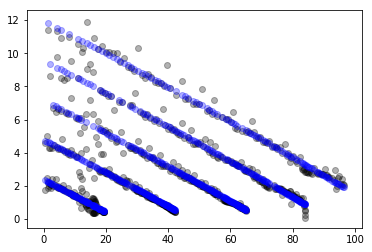

In [111]:
plt.scatter(X_train[:,1], y_train,  color='black', alpha=0.3)
plt.scatter(X_train[:,1], y_pred_train, color='blue', alpha=0.3)

plt.show()

In [112]:
# random shuffle of the data set
df = df.sample(frac=1).reset_index(drop=True)
df_features = df[['a', 'v']]
# add v² to features
df_features['v2'] = df_features['v'] * df_features['v']
print(df_features.head())
print('Number of samples {}'.format(df_features.size))

features = np.array(df_features)

split = int(df_features.shape[0] * 0.2)

X_train = features[:-split]
X_test = features[-split:]

y_all = np.array(df['throttle'])
y_train = y_all[:-split]
y_test = y_all[-split:]

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
print('MSE test = {:.4f}  MSE train = {:.4f}'.format(mse_test, mse_train))
print('Model coefficients = {}'.format(regr.coef_))

         a        v           v2
0  9.73195  17.0612   291.084545
1  4.71874  30.3649   922.027152
2  7.40406  21.6815   470.087442
3  1.55080  78.4427  6153.257183
4  1.42783  32.9286  1084.292698
Number of samples 2565
MSE test = 0.0044  MSE train = 0.0011
Model coefficients = [8.04881393e-02 8.04083210e-03 6.63745440e-06]
